# Plot Downloaded Stream Gauge Data
Here, provide the data file you downloaded. The script will load the data in an plot the discharge
We can also perform some statistics such as the mean and maximum during the time frame

In [0]:
# Load needed packages
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [0]:
# Here we connect to our google drive (Follow on screen instructions)
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Here we naviate to our working folder (yours might be different)
cd '/content/drive/My Drive/Colab Notebooks/ESCI491/RiverDischarge'

/content/drive/My Drive/Colab Notebooks/ESCI491/RiverDischarge


Below you must specify the file you would like to load. Make sure this file is in the same folder as this script, othwerwise you should provide the full file path

In [0]:
# Provide the filename of the downloaded data, 
# use the full path if the script is not in the same folder!
filename = '12213100_Daily.txt'

In [0]:
# Read in the data for pandas
#pd is pandas (library), sep is the seperator (delimiter) \t is tab,
#comment is #, one headerline, use the columns 2 and 3 (first column is 0).
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d') 
data = pd.read_csv(filename,
                   sep= '\t', 
                   comment = '#',
                   header = 1,
                   engine = 'python',
                   usecols = [2,3],
                   names = ('date','discharge'),
                   parse_dates = ['date'], 
                   date_parser = dateparse
                   )

t = data['date'].values
Q = data['discharge'].values

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.


In [1]:
# Plot teh discharge
plt.plot(t,Q)
plt.xlabel('time')
plt.ylabel('Discharge (cfs)')
plt.title('My title')
plt.set_xlim([datetime.date(2020, 5, 1), datetime.date(2020, 5, 30)])

NameError: ignored

In [0]:
Q_mean = np.mean(Q)
Q_max = np.max(Q)
print('Mean = {:4.2f}, Max = {:4.2f}'.format(Q_mean, Q_max))

Mean = 3338.46, Max = 22100.00


(array([736603., 736695., 736785., 736876., 736968., 737060., 737150.,
        737241., 737333.]), <a list of 9 Text major ticklabel objects>)

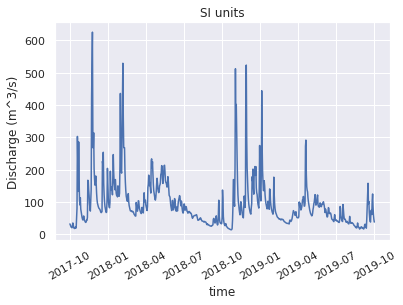

In [0]:
# Plot the discharge, in cubic meters / s
import seaborn as sns
sns.set()
Q_m = Q*0.0283168
plt.plot(t,Q_m)
plt.xlabel('time')
plt.ylabel('Discharge (m^3/s)')
plt.title('SI units')
plt.xticks(rotation=30)

In [0]:
Q_mean = np.mean(Q_m)
Q_max = np.max(Q_m)
print('Mean = {:4.2f}, Max = {:4.2f}'.format(Q_mean, Q_max))

Mean = 94.53, Max = 625.80
